Note: Some of the data in this notebook has been masked for privacy purposes.

# Importing Data & changing column names

In [98]:
import pandas as pd
import numpy as np

bank_2024_1 = pd.read_csv(r'path/to/file.csv', index_col = False)
bank_2024_2 = pd.read_csv(r'path/to/file.csv')
bank_2024_1['Income'] = np.where(bank_2024_1['Amount'] > 0, bank_2024_1['Amount'], 0)
bank_2024_1['Expenses'] = np.where(bank_2024_1['Amount'] < 0, bank_2024_1['Amount'].abs(), 0)
bank_2024_2 = bank_2024_2.rename(columns = {'Debit':'Expenses', 'Category':'Expenses Category', 'Posted Date':'Posting Date'})

# Income Category

In [99]:
def categories(row):
    if 'substring' in row['Description'] and row['Amount'] > 0:
        return 'Income_1'
    elif 'substring' in row['Description'] and row['Amount'] > 0:
        return 'Income_2'
    elif 'substring' in row['Description'] and row['Amount'] > 0:
        return 'Income_3'
    elif 'substring' in row['Description'] and row['Amount'] > 0:
        return 'Income_4'
    elif row['Amount'] < 0:
        return 'Non Applicable'
    else:
        return 'Other'

bank_2024_1['Income Category'] = bank_2024_1.apply(categories, axis = 1)

# Expenses Categories

In [100]:
# creating expenses categories for the second dataframe
def categories(row):
    if 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description']:
        return 'Exp_1'
    elif 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description']:
        return 'Exp_2'
    elif 'substring' in row['Description'] or 'substring' in row['substring'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description']:
        return 'Exp_9'
    elif 'substring' in row['Description'] and row['Expenses'] < 10:
        return 'Exp_3'
    elif 'substring' in row['Description']:
        return 'Exp_4'
    elif 'substring' in row['Description']:
        return 'Exp_5'
    elif 'substring' in row['Expenses Category']:
        return 'Exp_6'
    elif 'substring' in row['Expenses Category'] or 'substring' in row['Expenses Category'] or 'substring' in row['Expenses Category']:
        return 'Other'

bank_2024_2['Expenses Category'] = bank_2024_2.apply(categories, axis = 1)

# creating expenses categories for the first dataframe
def categories(row):
    if 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] and row['Amount'] < 0:
        return 'Exp_1'
    elif "substring" in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] and row['Amount'] < 0:
        return 'Exp_7'
    elif 'substring' in row['Description'] and row['Expenses'] > 10 or 'substring' in row['Description'] and row['Expenses'] > 10:
        return 'Exp_8'
    elif 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description']:
        return 'Exp_9'
    elif 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] or 'substring' in row['Description'] and row['Amount'] < 0:
        return 'Exp_6'
    elif 'substring' in row['Description'] and row['Expenses'] == 64:
        return 'Exp_10'
    elif 'substring' in row['Description'] and row['Amount'] < 0:
        return 'Exp_11'
    elif 'substring' in row['Description'] and row['Expenses'] == 200 or row['Expenses'] == 235:
        return 'Exp_12'
    elif 'substring' in row['Description'] and row['Expenses'] > 200 and row['Expenses'] < 1000:
        return 'Exps_13'
    elif 'substring' in row['Description'] and row['Expenses'] > 100:
        return 'Exp_14'
    elif 'substring' in row['Description'] or 'substring' in row['Description']:
        return 'Exp_15'
    elif 'substring' in row['Description']:
        return 'Exp_5'
    elif 'substring' in row['Description'] and row['Amount'] < 0:
        return 'Exp_16'
    elif 'substring' in row['Description']:
        return 'Exp_17'
    elif 'substring' in row['Description']:
        return 'Exp_4'
    elif 'substring' in row['Description'] and row['Amount'] < 0:
        return 'Exp_3'
    elif row['Amount'] > 0:
        return 'Non Applicable'
    else:
        return 'Other'

bank_2024_1['Expenses Category'] = bank_2024_1.apply(categories, axis = 1)

# Merging dataframes and shorting category names

In [101]:
import numpy as np 

bank_2024_1['Posting Date'] = pd.to_datetime(bank_2024_1['Posting Date'])
bank_2024_2['Posting Date'] = pd.to_datetime(bank_2024_2['Posting Date'])
bank_2024_1['Posting Date'] = bank_2024_1['Posting Date'].dt.strftime('%d/%m/%Y')
bank_2024_2['Posting Date'] = bank_2024_2['Posting Date'].dt.strftime('%d/%m/%Y')
df = pd.merge(bank_2024_1, bank_2024_2, left_on = ('Posting Date', 'Description', 'Expenses Category', 'Expenses'), right_on = ('Posting Date', 'Description', 'Expenses Category', 'Expenses'), how = 'outer')
df['Expenses Category'] = np.where(df['Expenses Category'].str.contains('substring'), 'substring', df['Expenses Category'])
df['Expenses Category'] = np.where(df['Expenses Category'] == 'Exp_8', 'Exp_8', df['Expenses Category'])
df['Expenses Category'] = np.where(df['Expenses Category'] == 'Exp_18', 'Exp_18', df['Expenses Category'])
df['Expenses Category'] = np.where(df['Expenses Category'] == 'Exp_10', 'Exp_10', df['Expenses Category'])
df['Expenses Category'] = np.where(df['Expenses Category'] == 'Exp_5', 'Exp_5', df['Expenses Category'])

# Tables

In [102]:
import warnings

df['Posting Date'] = pd.to_datetime(df['Posting Date'])
income_per_category = df[df['Income Category'] != 'Non Applicable'].groupby('Income Category')['Income'].sum().round().reset_index().sort_values('Income')
income_per_month = df[df['Income Category'] == 'Income_1'].groupby(df['Posting Date'].dt.month)['Income'].sum().round().reset_index(name = 'Income_1').rename(columns = {'Posting Date':'Month'})
expenses_per_category = df[(~df['Description'].str.contains('substring')) & (~df['Description'].str.contains('substring')) & (df['Expenses Category'] != 'Non Applicable')].groupby('Expenses Category')['Expenses'].sum().round().reset_index().sort_values('Expenses')
expenses_per_month = df[(~df['Description'].str.contains('substring')) & (~df['Description'].str.contains('substring')) & (df['Expenses Category'] != 'Non Applicable')].groupby(df['Posting Date'].dt.month)['Expenses'].sum().round().reset_index().rename(columns = {'Posting Date':'Month'})
per_month = pd.merge(Income_per_month, expenses_per_month, on = 'Month')
warnings.filterwarnings('ignore')

display(income_per_category)
display(expenses_per_category)
display(per_month)

,Income Category,Income
4,Other,27.0
2,Income_3,95.0
3,Income_4,731.0
1,Income_2,2115.0
0,Income_1,26074.0


,Expenses Category,Expenses
6,Exp_16,57.0
5,Exp_15,61.0
9,Exp_3,72.0
17,Other,97.0
14,Exp_8,124.0
13,Exp_7,203.0
2,Exp_11,206.0
8,Exp_2,415.0
12,Exp_6,443.0
10,Exp_4,585.0


,Month,Income_1,Expenses
0,1,2354.0,2396.0
1,2,2311.0,1480.0
2,3,2006.0,2277.0
3,4,1965.0,2142.0
4,5,3008.0,1885.0
5,6,2008.0,2458.0
6,7,2082.0,1352.0
7,8,1965.0,1939.0
8,9,2147.0,1830.0
9,10,2005.0,2289.0


# Totals and Monthly Net Income

In [103]:
print(f'Total Income: {income_per_category["Income"].sum()}')
print(f'Total Expenses: {per_month["Expenses"].sum()}')
print(f'Total Income from Income_1s: {per_month["Income_1"].sum()}')
print(f'Monthly Net Income: {per_month["Expenses"].mean().round() - per_month["Income_1"].mean().round()}')

Total Income: 29042.0
Total Expenses: 21968.0
Total Income from Income_1s: 26073.0
Monthly Net Income: -342.0


# Plots

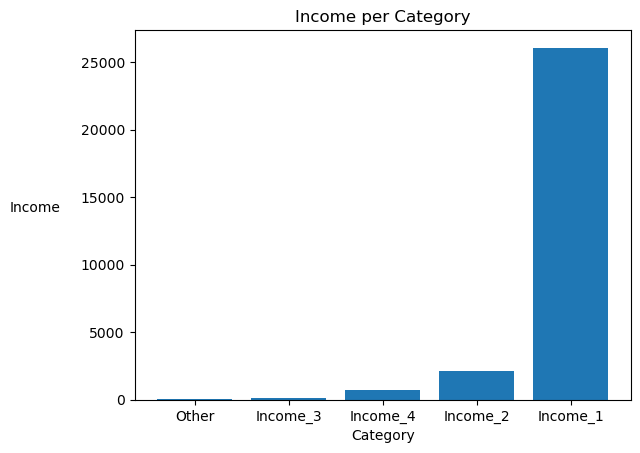

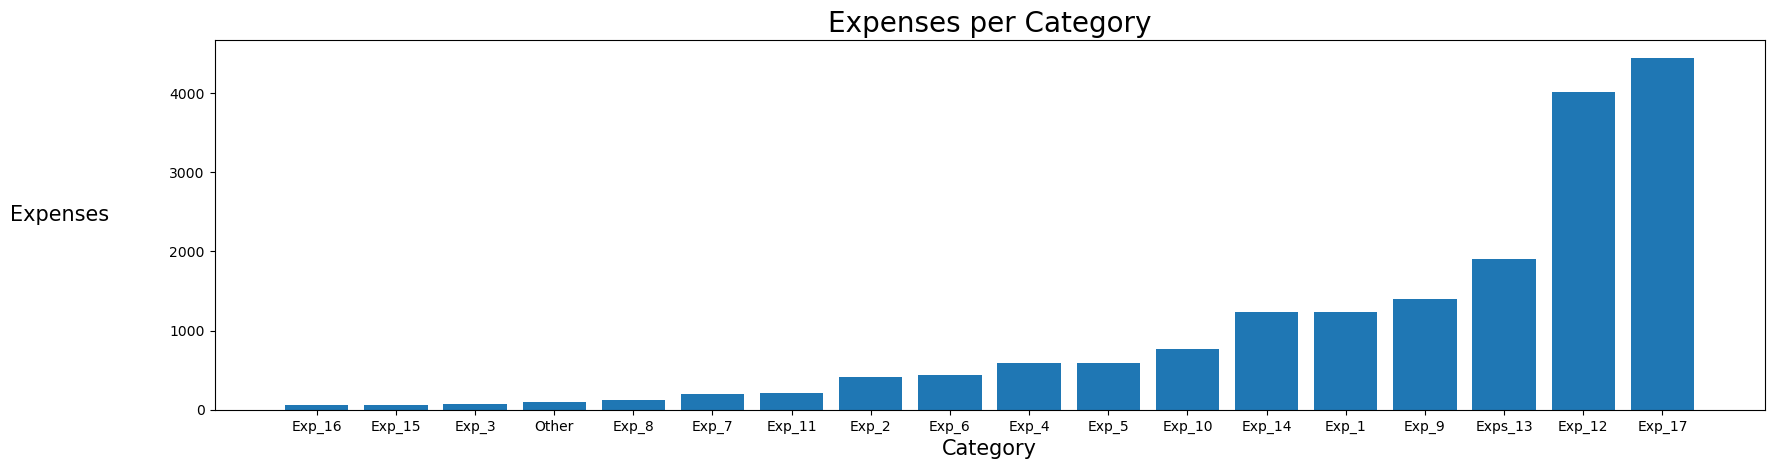

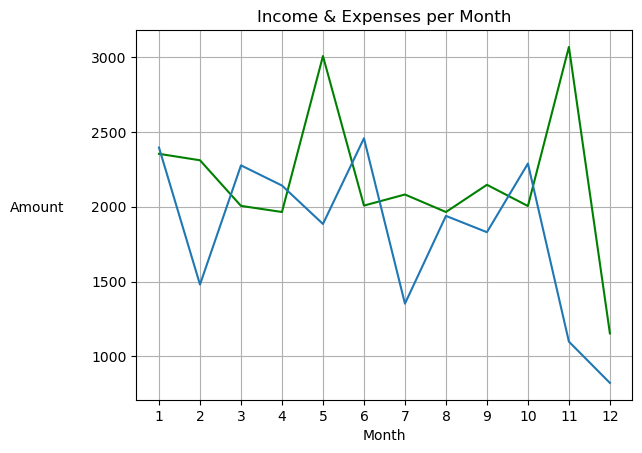

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.bar(income_per_category['Income Category'], income_per_category['Income'])
plt.title('Income per Category')
plt.xlabel('Category')
plt.ylabel('Income', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)
plt.show()

fig, ax = plt.subplots(figsize = (20, 4.8))
plt.bar(expenses_per_category['Expenses Category'], expenses_per_category['Expenses'])
plt.title('Expenses per Category', fontsize = 20)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Expenses', rotation = 'horizontal', fontsize = 15)
ax.yaxis.set_label_coords(-.1, .5)
plt.show()

fig, ax = plt.subplots()
plt.plot(per_month['Month'], per_month['Income_1'], color = 'green')
plt.plot(per_month['Month'], per_month['Expenses'])
plt.title('Income & Expenses per Month')
plt.xlabel('Month')
plt.xticks(per_month['Month'])
plt.ylabel('Amount', rotation = 'horizontal')
ax.yaxis.set_label_coords(-.2, .5)
plt.grid(True)
plt.show()